# Uniswap Trader

This is an example of using the EVM Simulator with Mesa to execute trades on Uniswap.  The model interacts with several contracts, including the Uniswap router, factory, pool manager, and the associated ERC20 contracts for WETH (wrapped ETH) and USDC. The trader makes a random walk to determine whether they'll buy or sell USDC.

We load the model with a snapshot of live, on-chain state, that was previously collected via an agent designed specifically to explore a broad range of liquidity across the USDC/WETH pool.  The state collected contains on-chain Uniswap and USDC contracts and storage state. This helps to preload contract storage that can be used in subsequent models.

In [42]:
from simular import PyEvm
from uniswap_demo import SimpleTrader, UniswapModel, setup_usdc
import matplotlib.pyplot as plt
%matplotlib inline

# we setup 20 agents to run for 500 steps
num_steps = 500
num_agents = 20

# load the snapshot data and run the model
with open("./data/snapshot_300.json") as f:
        snapshot = f.read()
evm = PyEvm.from_snapshot(snapshot)
setup_usdc(evm, num_agents)
model = UniswapModel(evm, SimpleTrader, num_agents=num_agents, num_steps=num_steps)
model.run_model()

100%|███████████████████████████████████████████████████████| 500/500 [00:02<00:00, 211.00it/s]


Pull the data into a Pandas DataFrame for analysis

In [4]:
df = model.datacollector.get_model_vars_dataframe()

Sample of the data collected in the model

In [5]:
df

,ETH,USDC,LIQ_ETH,LIQ_USDC,TICK,VOLUME
0,0.000370,2705.947724,14.657445,9917.057515,197287,0.000000
1,0.000370,2705.947724,14.657445,9917.057515,197287,16205.971544
2,0.000370,2705.062983,2.328223,43272.026852,197291,5357.473427
3,0.000370,2705.653993,16.646945,4533.866715,197289,10741.426803
4,0.000370,2705.359570,0.318723,48708.148905,197290,32352.532664
...,...,...,...,...,...,...
496,0.000371,2698.357896,11.173283,19362.175732,197316,137922.798659
497,0.000371,2698.064664,13.167783,13980.593342,197317,132499.385776
498,0.000371,2698.359366,11.163283,19389.159318,197316,132472.394678
499,0.000371,2698.360102,11.158283,19402.651117,197316,127048.385121


<Axes: title={'center': 'Swap Volume in USDC'}>

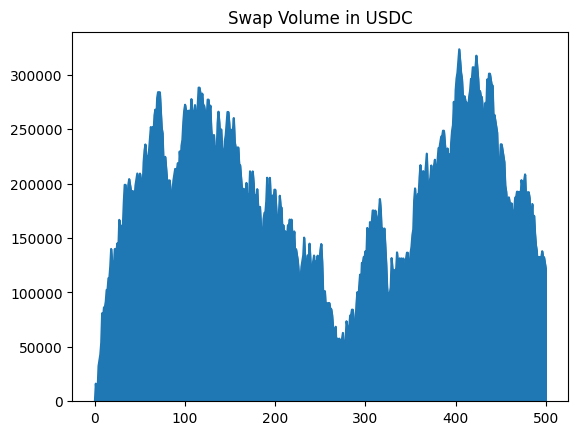

In [29]:
ECOLOR='#728FCE'
UCOLOR='#CFB172'
df.VOLUME.plot(kind='area', title='Swap Volume in USDC')

<Axes: title={'center': 'ETH price per 1 USDC'}>

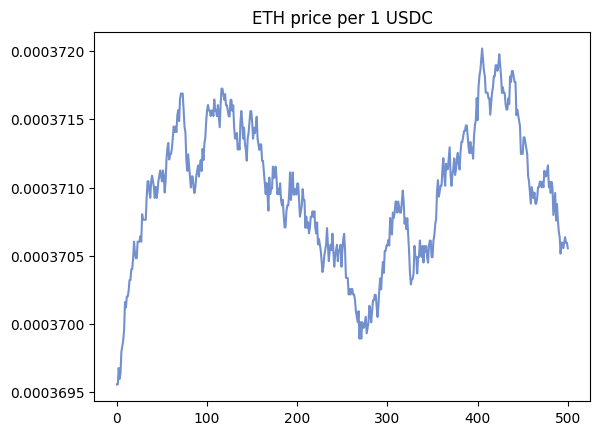

In [30]:
df.ETH.plot(title="ETH price per 1 USDC", color=ECOLOR)

<Axes: title={'center': 'USDC price per 1 ETH'}>

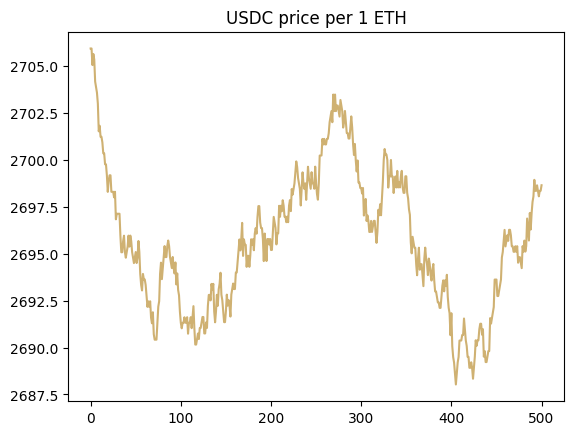

In [32]:
df.USDC.plot(title='USDC price per 1 ETH', color=UCOLOR)

<Axes: title={'center': 'ETH Liquidity over time'}>

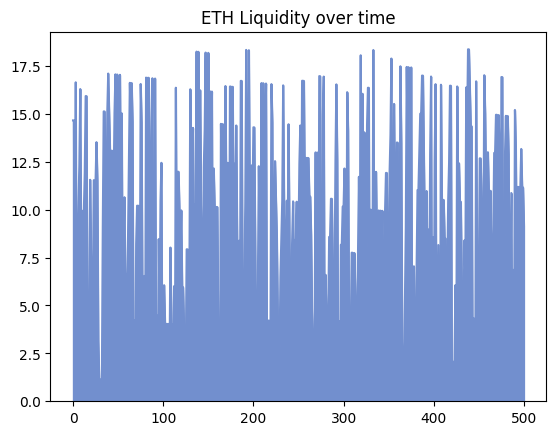

In [41]:
df.LIQ_ETH.plot(kind='area', color='#728FCE', title='ETH Liquidity over time')

<Axes: title={'center': 'USDC Liquidity over time'}>

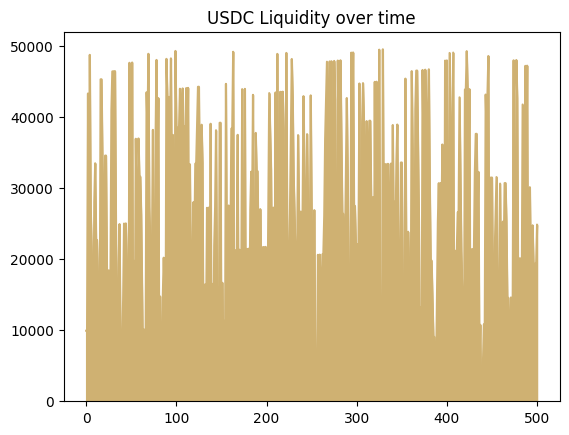

In [40]:
df.LIQ_USDC.plot(kind='area', color='#CFB172', title='USDC Liquidity over time')

Ticks are used in Uniswap v3 to help concentrate liquidity into ranges.  Ticks translate to a price.  The LP fee determines the space between ticks in basis points.  The graph below shows the frequency of trades within given LP ticks

<Axes: xlabel='tick', ylabel='Frequency'>

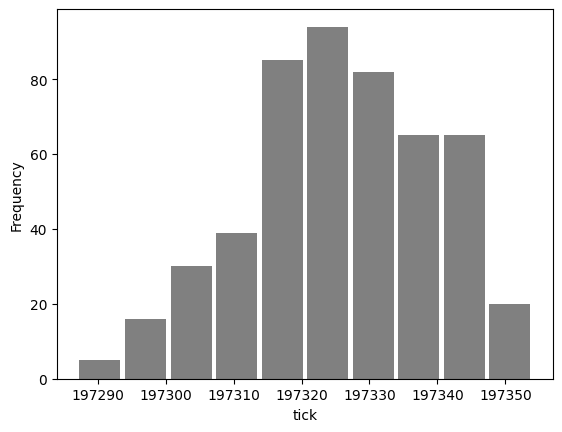

In [39]:
df.TICK.plot(kind='hist', color='grey', rwidth=0.9, xlabel='tick')